 Import Required Libraries

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

2025-04-14 09:50:56.626575: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744624256.954340      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744624257.032845      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


 Load and Visualize the Dataset

/tmp/ipykernel_31/2241902343.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/kaggle/input/daily-minimum-temperatures/1_Daily_minimum_temps.csv', parse_dates=['Date'])


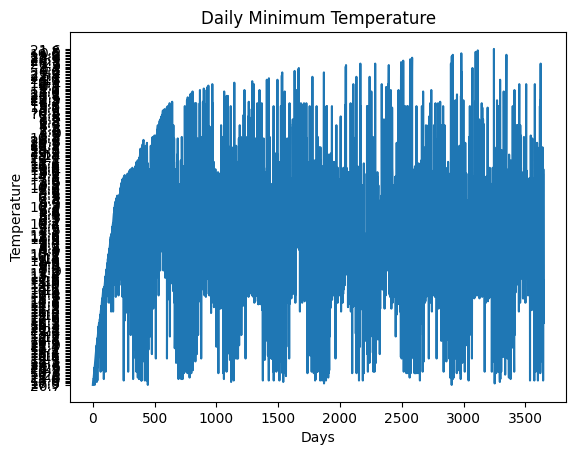

In [3]:
df = pd.read_csv('/kaggle/input/daily-minimum-temperatures/1_Daily_minimum_temps.csv', parse_dates=['Date'])

plt.plot(df['Temp'])
plt.title("Daily Minimum Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

Normalize the Dataset

In [5]:
# Clean temperature column: remove invalid characters and convert to float
df['Temp'] = pd.to_numeric(df['Temp'], errors='coerce')  # Invalid entries will become NaN

# Drop rows with NaN values (which were invalid)
df = df.dropna()

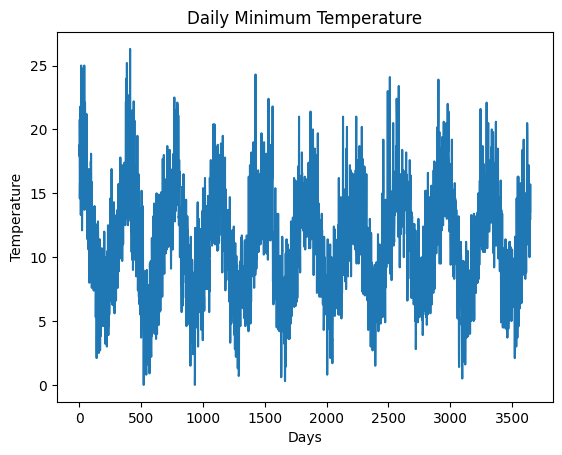

In [6]:
# Plot
plt.plot(df['Temp'])
plt.title("Daily Minimum Temperature")
plt.xlabel("Days")
plt.ylabel("Temperature")
plt.show()

In [7]:
# Normalize
data = df['Temp'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

Create Time Series Sequences

In [8]:
def create_sequences(data, time_step=10):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i+time_step])
        y.append(data[i+time_step])
    return np.array(X), np.array(y)

time_step = 10
X, y = create_sequences(scaled_data, time_step)

# Train-test split
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Build the LSTM Model

In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

I0000 00:00:1744624382.071408      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1744624382.072167      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 Compile the Model

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

Train the Model

In [11]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


I0000 00:00:1744624410.248648     115 cuda_dnn.cc:529] Loaded cuDNN version 90300


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0551 - val_loss: 0.0105
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - val_loss: 0.0098
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - val_loss: 0.0095
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0111 - val_loss: 0.0095
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0110 - val_loss: 0.0093
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0092
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0089
Epoch 8/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - val_loss: 0.0088
Epoch 9/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0102 - val_loss: 0.0085
Epoch 10/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0103 - val_loss: 0.0083
Epoch 11/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0106 - val_loss: 0.0081
Epoch 12/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0101 - val_loss: 0.0080

Test the Model and Visualize

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


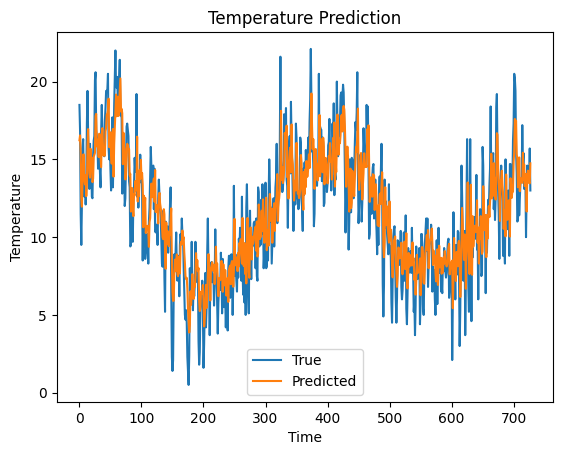

In [12]:
y_pred = model.predict(X_test)
y_pred_inverse = scaler.inverse_transform(y_pred)
y_test_inverse = scaler.inverse_transform(y_test)

plt.plot(y_test_inverse, label='True')
plt.plot(y_pred_inverse, label='Predicted')
plt.title('Temperature Prediction')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

 Plot Loss vs Epoch

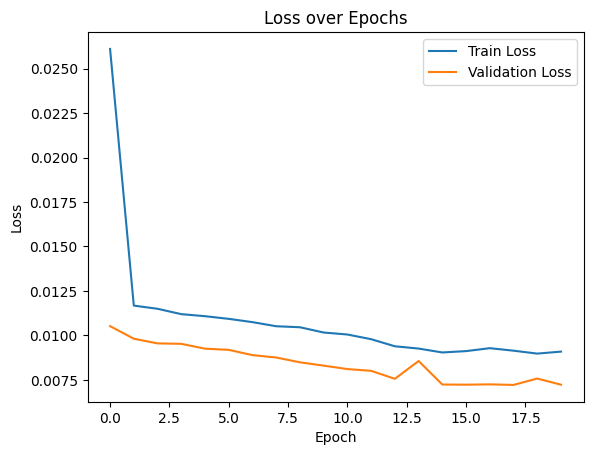

In [13]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()